# One-hot encoding of words or characters
Avandi 1920101031

TOKENAIZER : adalah proses pemisahan suku kata atau suku huruf menjadi sebuah array berdimensi tertentu. tools ya dikenal sebagai Token<br>
misal pada sebuah kalimat <font color=blue>( "hari ini sabtu saya harap semua baik" )</font> <br>

satu kalimat ini bisa saja kita pecah menjadi beberapa penggalan kata    dengan menggunaka Token menjadi<br> <font color=blue>
             {[hari],[ini],[sabtu],[saya],[harap],[semua],[baik]}<br></font>



kalo di perhatian kalimat sebelumnya di rubah menjadi sebuah objek  dimana tiap elementnya mempunya index dan value , index ini besifat interger( bilang bulat yg menyatakan urutan atau posisi kata dalam stuktur kalimat ). kita akan merubah tiap index kata  menjadi sebuah vector N dimana value kata tersebut bernilai 1 sedangkan kata lain di struktur kaliman menjadi 0 





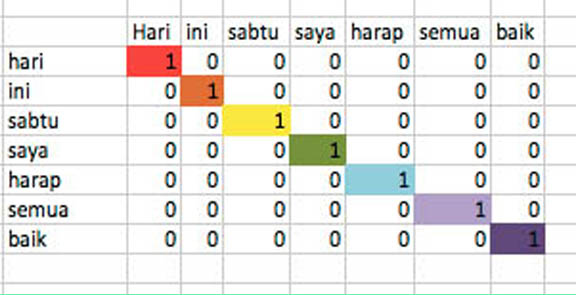

In [1]:
import keras
keras.__version__

'2.4.3'

# Word level one-hot encoding [merubah kata pada kalimat to vektor]

In [ ]:
import numpy as np

# 
# contoh pada paragraf yang terdiri dari 2 buah kalimat
samples = ['hari ini sabtu ', 'saya harap semua baik', 'saya adalah siswa']
# ada 7 suku kata biasanya di tambah 1 sebagai pemisah <- akan menjadi len dimensi 3
#lebar Dim-1 = banyak nya frase ( instances)
#lebar Dim-2 = banyak batasan suku kata max /frase ( timestep)
#lebar Dim-3 = banyak nya total suku kata +1 (feature)

# pertama kita buat indexnya  terlebih dahulu dgn nama token_index sebuah dictionary
token_index = {}
for sample in samples:
    # menggunakan metode pemisahan 
    # kita juga bisa menggunakan functual umum yg biasa digunakan pemulisan kalimat (, sepasi,titik tandabaca)
    # kita rumah sample nya 
    for word in sample.split():
        if word not in token_index:
            # beri index pada tiap kata mua 
            token_index[word] = len(token_index) + 1
            # Nomor index sesuai dgn urutan kata 

# Next, we vectorize our samples.
# kita akan batasi struktur nya  misal nya  10 kata saya .
max_length = 10 #<-- menjadi len dimensi ke 2 

# This is where we store our results:
results = np.zeros((len(samples), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1.

 #### bentuk dimensi Paragraf

In [ ]:
results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]

In [ ]:
results.shape, type(results)# 3 banyak kalimat ,10 batas frase vocab 10 =(total token9 +1)

((3, 10, 10), numpy.ndarray)

#### Jumlah Token

In [ ]:
index

9

In [ ]:
results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]

## KESIMPULAN I
1. ! hot encoding merubah kata kedalam vector dimensi dimana dimensi vektor nya akan terus bertambah jika suku kata ( token ) nya bertambah
2. vector di 1HC ( 1hot encoding )  terdiri dari nilai 1 dan 0 ( spartial )
3. argument yg di gunakan { jumlah kalimat, batasan kata pd kamus , jumlah token }




# Character level one-hot encoding (Represetasi urutan token )


keras memiliki bult in utility untuk melakukan 1 hot encoding text/word/charcter dari data beruba text. ini digunakan untuk menghitung feature,seperti membela karakter dari kata,atau hanya mengambil N kata yang umum di dataset( untuk menghindari vector space yang besar )

Keras menciptakan tools untuk melakukan encoding text berbentuk kata maupun huruf  dari sebuah dokument mentah , yang dapat digunakan menghitung jumlah feature pada document tesebut ,kata 2 ber ulang akan di anggap 1 saja  untuk meng hemat dimensi /vektor space


## sebagai contoh kita punya paragraf
####" Aple aple batu batu batu kecil cilik cilik' ,'hari ini chopin sedang main piano', 
####'besok bram putus cinta',
###'ayu tingting dimana dimana alamatnya "####

In [ ]:
from keras.preprocessing.text import Tokenizer

samples = ['Aple aple batu batu batu kecil cilik cilik' ,
           'hari ini chopin sedang main piano',
           'besok bram putus cinta',
           'ayu tingting dimana dimana alamatnya ']# We create a tokenizer, configured to only take

# into account the top-1000 most common words
tokenizer = Tokenizer(num_words=1000)# batasan vocab
# This builds the word index
tokenizer.fit_on_texts(samples)

# This turns strings into lists of integer indices.
sequences = tokenizer.texts_to_sequences(samples)# meng urutkan token pada kalimat

# You could also directly get the one-hot binary representations.
# Note that other vectorization modes than one-hot encoding are supported!
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary') # 1 hot representasi /1 hot feature representasi 




#### Dari total 23 kata  ditemukan 18 unik token 

In [ ]:
# This is how you can recover the word index that was computed
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 18 unique tokens.


'<font color=green> Aple aple</font>  <font color=blue> batu batu batu</font> kecil <font color=orange>cilik cilik'</font>  ,'hari ini chopin sedang main piano','besok bram putus cinta','ayu tingting<font color=red> dimana dimana </font>  alamatnya ' 


#### Jika dilihat  posisi kata dalam kalimat tersebut dilambangkan dengan urutan ke unik-an Token

In [ ]:
sequences # urutan index berdasarkan posisi 

[[2, 2, 1, 1, 1, 5, 3, 3],
 [6, 7, 8, 9, 10, 11],
 [12, 13, 14, 15],
 [16, 17, 4, 4, 18]]

In [ ]:
word_index # kalo diliha index pertama  dgn frekuensi terbanyak lalu di ikuti dgn urutan abjat

{'alamatnya': 18,
 'aple': 2,
 'ayu': 16,
 'batu': 1,
 'besok': 12,
 'bram': 13,
 'chopin': 8,
 'cilik': 3,
 'cinta': 15,
 'dimana': 4,
 'hari': 6,
 'ini': 7,
 'kecil': 5,
 'main': 10,
 'piano': 11,
 'putus': 14,
 'sedang': 9,
 'tingting': 17}

## Bentuk dan dimensi vektornya 

In [ ]:
one_hot_results.shape#( 4 kalimat, dalam 1000 batas vocab)

(4, 1000)

In [ ]:
one_hot_results

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# one hot hashing trick
variasi lain dari one-hot encoding dikenal sebagai “one-hot hashing trick”,<br> yang mana dapat digunakan  ketika jumlah unuk tokens vocabulary sangat banyak dan susah. <br>daripada susah susah meng index an vocab itu, dengan mengunakan cara hash men vectors kata dgn ukuran yang tetap. <br>Hal ini biasanya dilakukan dengan fungsi hashing yang sangat ringan.<br>Keuntungan utama dari metode ini adalah bahwa hal itu tidak jauh dengan mempertahankan indeks kata eksplisit, , yang mana menghemat memory dan memungkinkan dilalukan secara online. <br> tapi kelemahannya adalah rentan terhadap tabrakan”: 2 buah kata yang berbeda bisa dianggap hash yang sama, <br> akibatnya mesin /model tidak dpt membedakan kata kata tersebut. <br>
Kemungkinan tabrakan hash berkurang ketika dimensi ruang hashing jauh lebih besar daripada jumlah total token unik yang di-hash.

Word-level one-hot encoding with hashing trick (toy example):

In [ ]:
samples = ['katanya mau masak ayam goreng']
# kita sengaja buat 5 token yang kan di masukan kedalam 
# maximal vocab yang sempit(5) dan dimensi yang sempit (5)
# hasilnya akan menjadikan vektor representasi yang berulang 
# atau tabrakan 1-2 kata 

dimensionality = 5
max_length = 5

results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        # Hash the word into a "random" integer index
        # that is between 0 and 1000
        index = abs(hash(word)) % dimensionality
        results[i, j, index] = 1.

In [ ]:
results.shape #1 kalimat 5 batas vocab 5 dimensi hash

(1, 5, 5)

In [ ]:
results

array([[[1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1.]]])

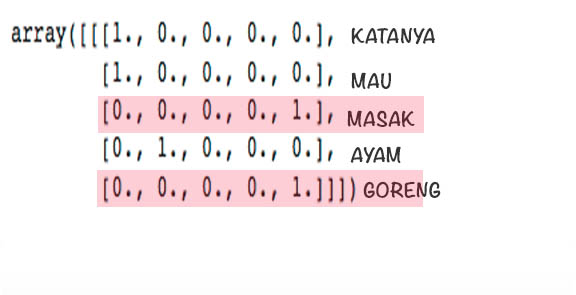

### terjadi pengulangan vector yang sama pada 2 buah kata yang berbeda makna "masak" & "goreng". katanya dan mau hal ini karena jumlah index yg angap token hanya 4 representasi

In [ ]:
hash(word)# gak tau dpt perkalian dari mana ?

6677042699468678914

In [ ]:
index # abs hash dibagi dimensi 

4

# Kesimpulan II
# pada 1 hot reprenstation menggunakan urutan token dimana tiap kalimat merupan susuan dari urutan token , dimensi vektor kalimat masih mengikuti jumlah /banyak nya token penyusunnya 

#pada 1 hash terjadi penghematan representasi dimana mengunakan batas batas yang stabil ( tetap ) , tetapi karena batas batas tersebut memungkinkan terjadi tabrakan kata,  maksudnya ada 1 vector yang mempresentasikan beberapa kata yang berbeda , ini dikarenakan perhitungan index/token berdasarkan sisa pembagian dimensi 

# WORD EMBBEDING 

Salah satu metode yang populer yang dapat digunakan  dalam merubah kata kedalam vektor dikenal sebagai Word embedding. <br>Perbedaan word embedding dengan 1hote encoding adalah  pada jumlah dimensinya. Dimana pada 1 encoding dimensi terus naik seiring dengan bertambahnya token/suku kata . pada word embiding vektor dimensi yang dihasilkan relatif lebih kecil dbanding 1 hot encoding . Pengertian embed disini adalah merubah vektor dimensi yang terus bertambah (komplek )di embed ( ditumpangkan ) ke dalam vektor yang lebih tetap ukuran dimensinya cara nya dengan menggunakan sebuah katagorikal /label atau feature representasi seperti ( misal Gender, Alamat, jenis, type dan lain lain 

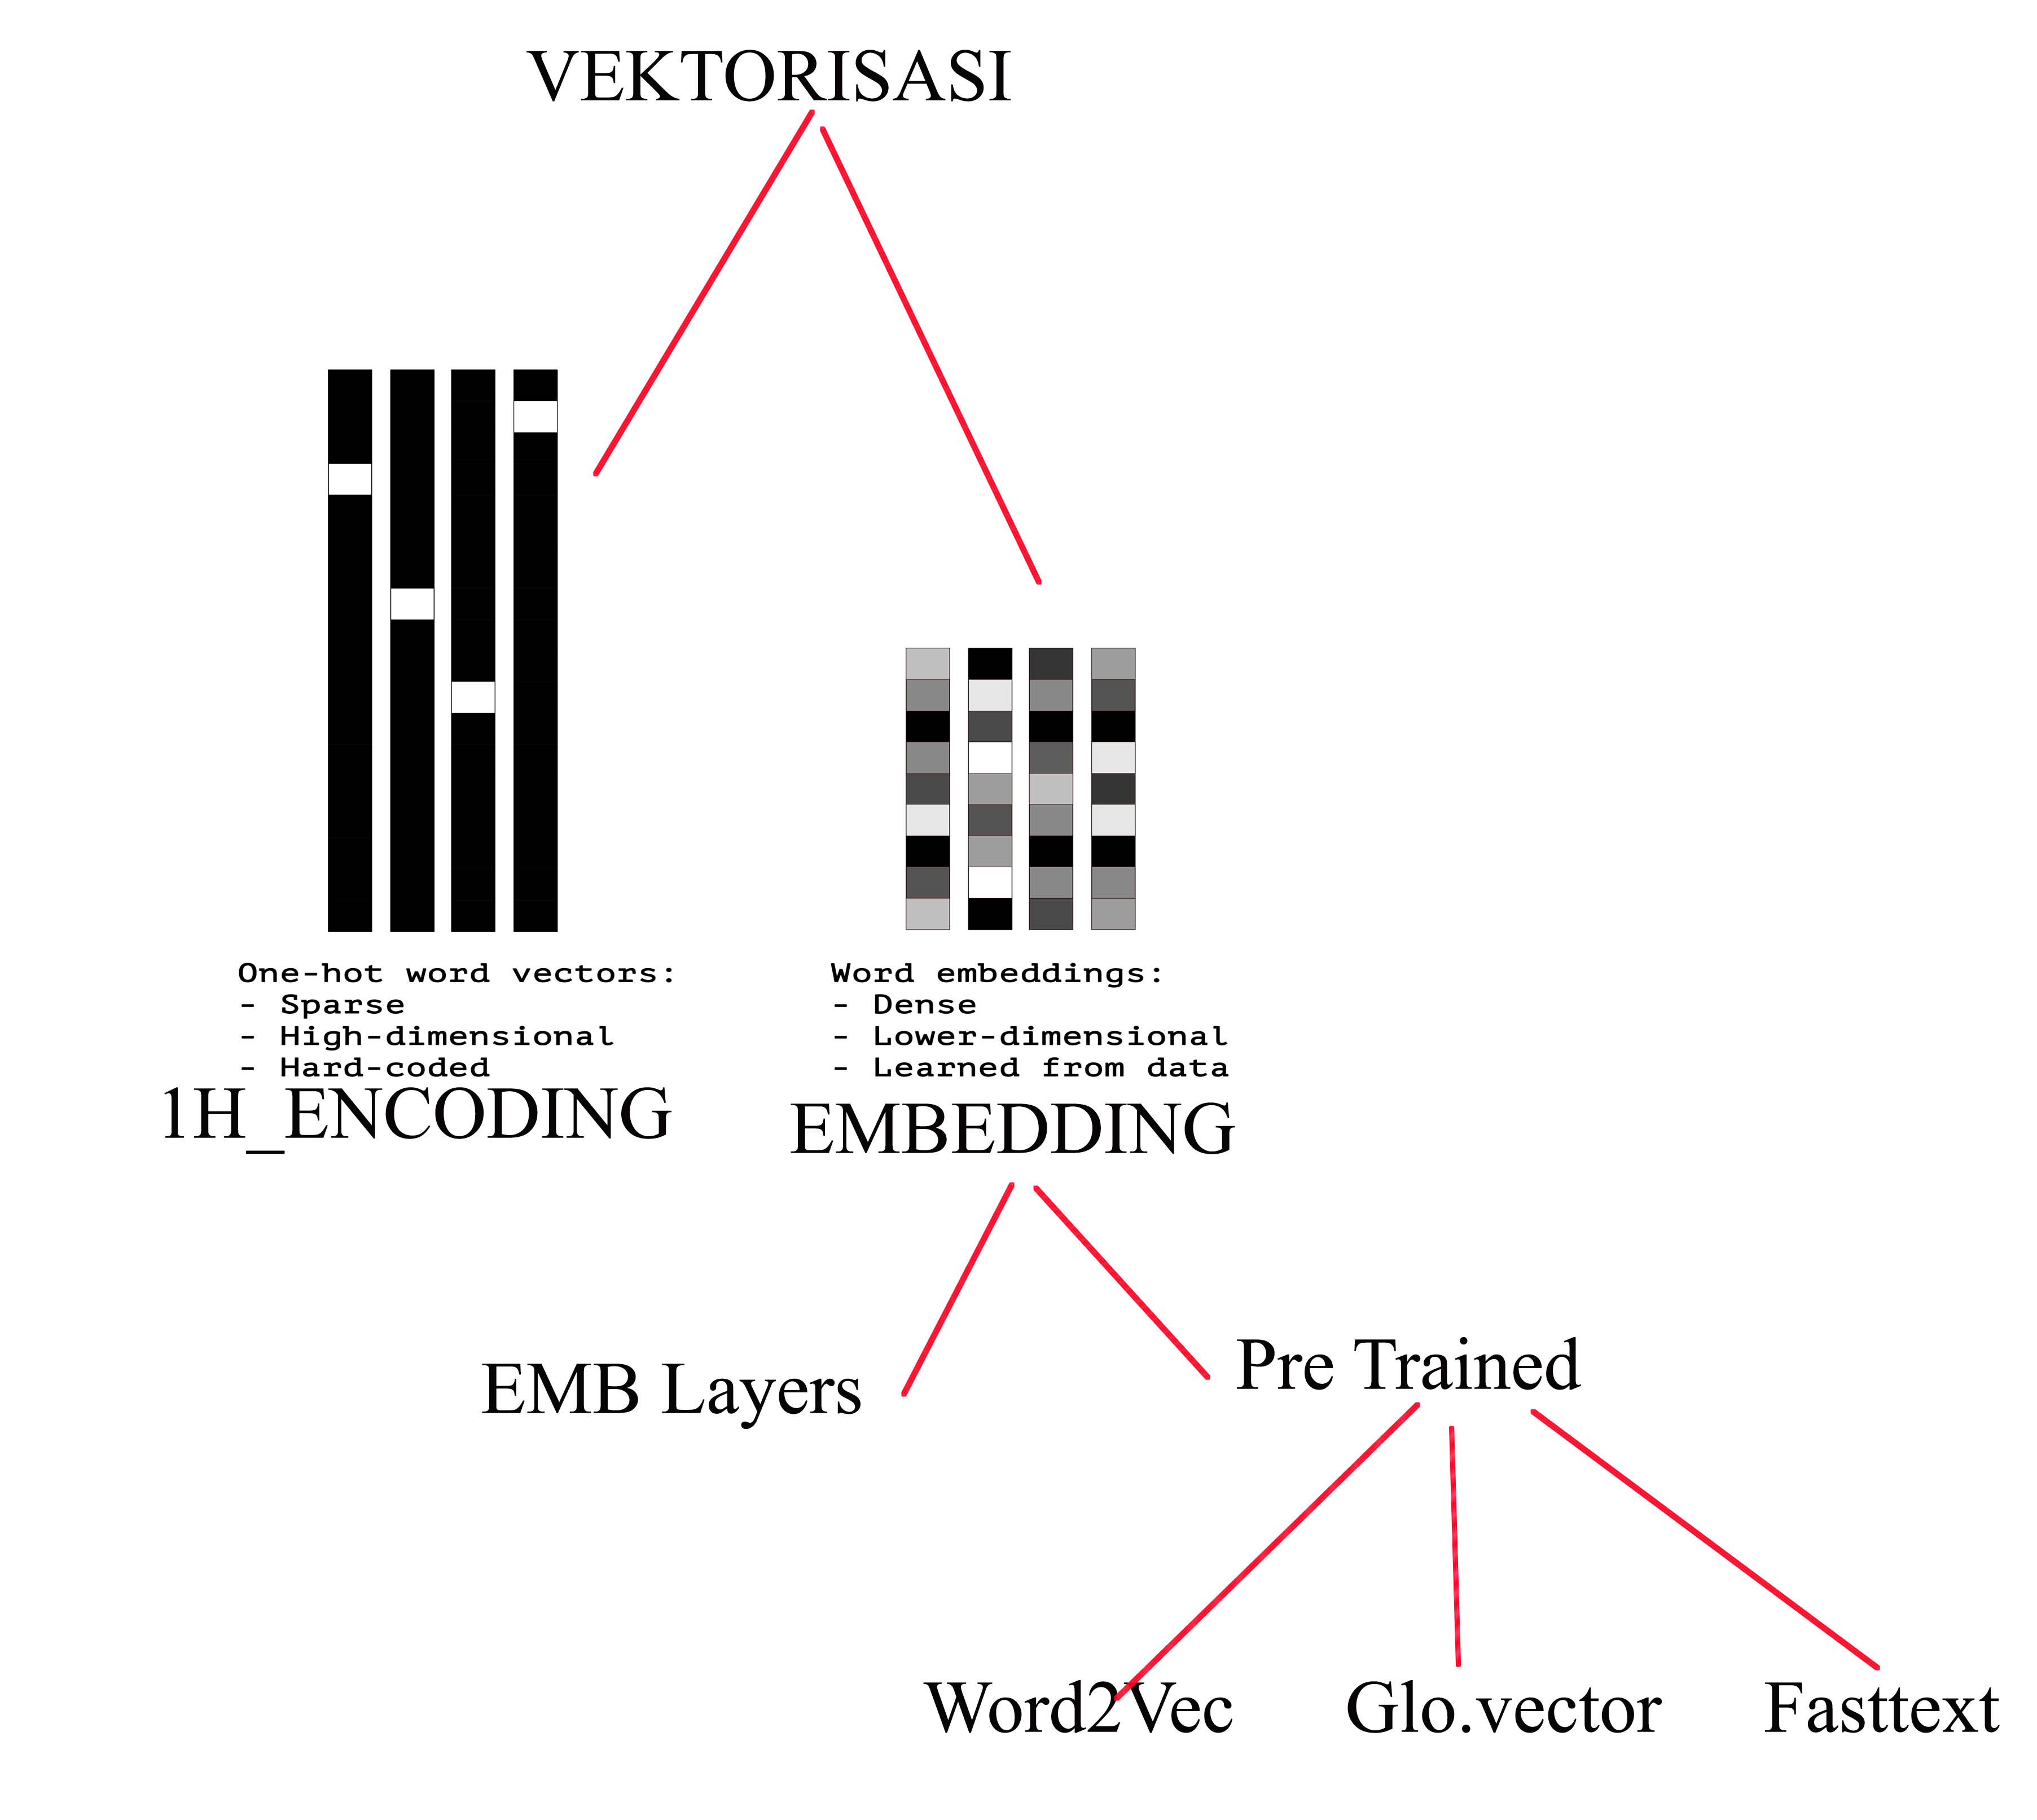


Ide dari word embedding adala memetakan kata dalam bahasa manusia  agar dapat di gunakan pada proces NLP .vektor presentasi kata/kalimat membentuk suatu objek geometrik pada dimensi embed dimana 
Terdapat hubungan antara Struktur geometrix  word embedding dengan struktur NLP secara   semantik dan pramatik .<br> Simantik adalah makna dan arti sebuah kata sedangkan Pramatik : context /posisi  pemakaian kata tersebut relevant dengan kalimat nya. Bisa nya secara geomatri kata kata yang mempunyai simantik (sinonim akan berdekatan cluster/posisi nya ) jarak 1 kata dan kata lainya menunjukan sisi pramatik kata dalam kalimat 

Pada Embedding layer memakai tensor-2D dengan beberapa argument bilangan bulat yaitu ( jumlah sample, urutan_panjang kalimat ).  ide dari embbeding layer  adalah kalimat yang telah menjadi vektor dari 1 hot encoding di mapping kan secara representasi ke pada beberapa  dimensi katagoriical/lebel (contoh, gender,buah, ukuran benda dan lain nya) .ada beberapa argument /parameter pada  embbeding layer 

1. jumlah vocab ( banyaknya kata yang digunakan pada suatu kamus , misal kamus indonesia ada 60.000 kata )
2. Jumlah dimensi output ( jumlah output yang di inginkan bisa nya disesuaikan dengan banyak katagory yg di inginkan ) 
3. Max length = (panjang kata yang di izin kan dari sebuah input kalimat )
4. padding = adalah banyak nya angka 0  untuk melengkapi matrik dense dimana vektor nya harus mempunyai kesama panjang dimensi, maka pedding akan me motong (input)vektor yg terlalu panjang dan menambah index o bila terlalu pendek 



# EMBBEDING  dgn Embbed Layer dari Keras 

In [ ]:
from tensorflow.keras.preprocessing.text import one_hot
import numpy as np

In [ ]:

# menggunaka lyrik lagu balon ku  ciptaan mbah habib 
lagu = ['Balonku ada lima',
'Rupa rupa warnanya',
'Hijau kuning kelabu',
'Merah muda dan biru',
'Meletus balon hijau', 'dor!',
'Hatiku sangat kacau'
'Balonku tinggal empat',
'Kupegang erat-erat',]


In [ ]:
voc_size=100 # batas kamus misal 100 kata 

In [ ]:
onehot_repr=[one_hot(words,voc_size)for words in lagu] 
print(onehot_repr) # bisa dilihat  jumlah list pada kalimat tidak selalu sama ada yg 1 , 2, 3,...n
                   # tiap kata dilambangkan dengan index urutan token 
                   # list list yang tidak seragam ini kita akan rapikan kan kedalam batas jumlah list yg sama yaitu misal 8

[[62, 78, 2], [23, 23, 90], [31, 96, 76], [16, 10, 86, 59], [66, 81, 31], [55], [91, 24, 60, 45, 50], [37, 96, 96]]


In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

In [ ]:
sent_length=8
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)# padding pre= 0 nya di depan post 0 dibelakang
print(embedded_docs)# hasil nya adalah jumlah list yang seragam-8
                    # agar seragam  kita menggunakan isian padding bernilai 0
                    # sehingga berbentuk seperti dibawah 

[[ 0  0  0  0  0 62 78  2]
 [ 0  0  0  0  0 23 23 90]
 [ 0  0  0  0  0 31 96 76]
 [ 0  0  0  0 16 10 86 59]
 [ 0  0  0  0  0 66 81 31]
 [ 0  0  0  0  0  0  0 55]
 [ 0  0  0 91 24 60 45 50]
 [ 0  0  0  0  0 37 96 96]]


In [ ]:
embedded_docs.shape # 8 baris kalimat ke 8 vektor dimensi 

(8, 8)

## selanjut nya  dokumen ini akan kita embed kan ke sebuah vekto dimensi tetap  misal berdimensi dim=10

In [ ]:
model=Sequential()
model.add(Embedding(voc_size,10,input_length=sent_length))
model.compile('adam','mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 8, 10)             1000      
Total params: 1,000
Trainable params: 1,000
Non-trainable params: 0
_________________________________________________________________


# kita tidak akan traning  krn ini bukan proces klasifikasi  hanya merubah 1 hot presentasi ke dalam  vektor word embed

In [ ]:
print(model.predict(embedded_docs))

[[[-0.0186426  -0.01116385  0.00795276  0.04106143  0.00250052
   -0.00385001  0.0142161  -0.02474886  0.01540139 -0.03093827]
  [-0.0186426  -0.01116385  0.00795276  0.04106143  0.00250052
   -0.00385001  0.0142161  -0.02474886  0.01540139 -0.03093827]
  [-0.0186426  -0.01116385  0.00795276  0.04106143  0.00250052
   -0.00385001  0.0142161  -0.02474886  0.01540139 -0.03093827]
  [-0.0186426  -0.01116385  0.00795276  0.04106143  0.00250052
   -0.00385001  0.0142161  -0.02474886  0.01540139 -0.03093827]
  [-0.0186426  -0.01116385  0.00795276  0.04106143  0.00250052
   -0.00385001  0.0142161  -0.02474886  0.01540139 -0.03093827]
  [-0.02221613  0.00952455  0.01524964 -0.00094633  0.01937267
    0.03181464  0.00317998  0.00646137  0.03473512  0.01741238]
  [ 0.04020247  0.01806452  0.04163055  0.01482048 -0.04293267
   -0.03900956 -0.03685672 -0.02241424 -0.0458693   0.01789608]
  [ 0.02129904  0.01205987 -0.04506037  0.03987246 -0.02284458
    0.00331483 -0.00173155  0.032734    0.017240

In [ ]:
a=model.predict(embedded_docs)
a.shape # 8 buah lyrik disusun ke 8 list yg teratur  di embed ke dalam vector dimensi 10 
        #  element vektornya tidak lagi bilang  bulat  dan merupakan presentasi dari rata2/peluanng pada keseluruhan lyrik 

(8, 8, 10)

# mempredict vektor tiap kata pada wordembed 

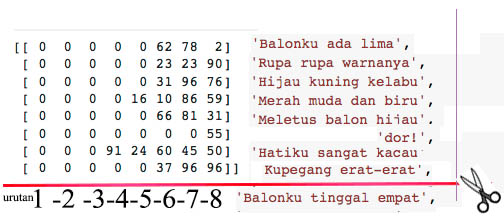

# vektor secara keseluruhan lirik 

In [ ]:
print(model.predict(embedded_docs)[1])# vektor dari lyrik ke 2

[[-0.0186426  -0.01116385  0.00795276  0.04106143  0.00250052 -0.00385001
   0.0142161  -0.02474886  0.01540139 -0.03093827]
 [-0.0186426  -0.01116385  0.00795276  0.04106143  0.00250052 -0.00385001
   0.0142161  -0.02474886  0.01540139 -0.03093827]
 [-0.0186426  -0.01116385  0.00795276  0.04106143  0.00250052 -0.00385001
   0.0142161  -0.02474886  0.01540139 -0.03093827]
 [-0.0186426  -0.01116385  0.00795276  0.04106143  0.00250052 -0.00385001
   0.0142161  -0.02474886  0.01540139 -0.03093827]
 [-0.0186426  -0.01116385  0.00795276  0.04106143  0.00250052 -0.00385001
   0.0142161  -0.02474886  0.01540139 -0.03093827]
 [-0.01636446 -0.02865319  0.04106555  0.04103056  0.03098262 -0.02790905
  -0.04530002  0.01945696  0.00837125 -0.0356239 ]
 [-0.01636446 -0.02865319  0.04106555  0.04103056  0.03098262 -0.02790905
  -0.04530002  0.01945696  0.00837125 -0.0356239 ]
 [-0.02233911 -0.01997982 -0.01227347  0.01820305 -0.03152511 -0.03913423
  -0.01534211  0.02009282 -0.02519243  0.04753565]]

# vektor padding 0 pada lyrik 1 dan lyrik ke 2 mempunyai vektor yg sama 

In [ ]:
print(model.predict(embedded_docs)[0][0])

[-0.0186426  -0.01116385  0.00795276  0.04106143  0.00250052 -0.00385001
  0.0142161  -0.02474886  0.01540139 -0.03093827]


In [ ]:
print(model.predict(embedded_docs)[0][1])

[-0.0186426  -0.01116385  0.00795276  0.04106143  0.00250052 -0.00385001
  0.0142161  -0.02474886  0.01540139 -0.03093827]


## vektor pada kata  biru, merah,hijau

In [ ]:
print(model.predict(embedded_docs)[3][7]) #biru
print(model.predict(embedded_docs)[3][4]) #merah
print(model.predict(embedded_docs)[4][5]) #hijau
biru = model.predict(embedded_docs)[3][7]
merah = model.predict(embedded_docs)[3][4]
hijau =  model.predict(embedded_docs)[4][5]
kuning=  model.predict(embedded_docs)[2][6]

[-0.04546659 -0.01495913 -0.04870227 -0.02658904 -0.00504146 -0.02623032
  0.00931686 -0.04749903 -0.004968   -0.00198133]
[-0.04036941 -0.03514576 -0.02972378 -0.01045493 -0.0413072   0.0382246
  0.02146831 -0.04219624  0.03599318  0.00223418]
[-0.03345029 -0.02660871 -0.01449632 -0.04730887 -0.00726117  0.0459088
 -0.0235646  -0.04665623  0.03090212  0.00530253]



# ASPEK NATURAL LANGUAGE ( bahasa alami ) dari WordEmbedd#

DALAM bahasa alami ada 2 faktor yang digunakan untuk memahami kalimat /kata. yaitu faktor :<br>
Semantik : arti /makna kata tersebut  dilihat dari kesamaan kemiripan<br>
Pramatik : arti dari kontek kata dalam kalimat(posisi kata di kalimat)<br>



kata kata dengan makna yang sama sinonim mempunyai posisi vektor yang berdekatan, sedangkan kata kata yang mempunyai konteks yang mirip mempunyai resultan vektor yang berdekatan <br>
contoh kata : biru , merah, hijau  sematik mungkin berbeda tetapi pramatiknya  sama kita check secara vektor 

In [ ]:
blue=np.linalg.norm(biru)
red=np.linalg.norm(merah)
green =np.linalg.norm(hijau)
blue,red,green # bisa dilihat biru,merah,hijau mempunyai resultan/vektor satuan yang berdekatan 


(0.09195047, 0.10279611, 0.100750744)

In [ ]:
biru,merah,hijau # biru punya kordinat (9 negative,1 positive)
                 # merah punya kordinat  6 negative, 4 positive)
                 # hijau punya kordinta ( 7 negative, 3 positive)

(array([-0.04546659, -0.01495913, -0.04870227, -0.02658904, -0.00504146,
        -0.02623032,  0.00931686, -0.04749903, -0.004968  , -0.00198133],
       dtype=float32),
 array([-0.04036941, -0.03514576, -0.02972378, -0.01045493, -0.0413072 ,
         0.0382246 ,  0.02146831, -0.04219624,  0.03599318,  0.00223418],
       dtype=float32),
 array([-0.03345029, -0.02660871, -0.01449632, -0.04730887, -0.00726117,
         0.0459088 , -0.0235646 , -0.04665623,  0.03090212,  0.00530253],
       dtype=float32))

# PRE TRAINING EMBBEDING 
Kadang kita tidak mempunya data yang cukup besar dalam membuat suatu applikasi berbasis kata, tapi kita ingin kata(data ) kita yg kecil ini mempunyai vektor yang cukup bagus dalam meprediksi simatik/pramatik kata.<br> hal ini dapat kita lakukan dengan cara mengambil embed vektor dari data data yang telah di embed dgn embedtan yang struktur nya lebih tinggi dan besar .harapan nya dengan mengunakan pre traind data kita yag kecil dapat digeneralisasikan penggunaanya seperti menggunakan wordembedd yang kompleks.

ada beberapa jenis embbeding/ text clasifikasi yang umum digunakan diantaranya <br>
1.word2vect/ Google <br>
2.Global vector /standford<br>
3.Fast text dr facebook


# Menggunakan Pre-train Global vector ( Glove ) 

## PERSIAPKAN DATA DR IDM DAN GLOVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.datasets import imdb

In [ ]:
#import os
#os.chdir('/content/drive/My Drive/DL/')
#!wget -c "http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip" 

--2020-10-09 09:54:11--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  2.14MB/s    in 6m 30s  

2020-10-09 10:00:41 (2.11 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [ ]:

#import os
#os.chdir('/content/drive/My Drive/DL/')
#!wget -c "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz" 

--2020-10-09 11:14:05--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [ ]:
#!unzip '/content/drive/My Drive/DL/glove.6B.zip' -d '/content/drive/My Drive/DL/glove.6B/'

Archive:  /content/drive/My Drive/DL/glove.6B.zip
  inflating: /content/drive/My Drive/DL/glove.6B/glove.6B.50d.txt  
  inflating: /content/drive/My Drive/DL/glove.6B/glove.6B.100d.txt  
  inflating: /content/drive/My Drive/DL/glove.6B/glove.6B.200d.txt  
  inflating: /content/drive/My Drive/DL/glove.6B/glove.6B.300d.txt  


In [ ]:
#!tar -xvzf '/content/drive/My Drive/DL/aclImdb_v1.tar.gz'

Streaming output truncated to the last 5000 lines.
aclImdb/train/unsup/44982_0.txt
aclImdb/train/unsup/44981_0.txt
aclImdb/train/unsup/44980_0.txt
aclImdb/train/unsup/44979_0.txt
aclImdb/train/unsup/44978_0.txt
aclImdb/train/unsup/44977_0.txt
aclImdb/train/unsup/44976_0.txt
aclImdb/train/unsup/44975_0.txt
aclImdb/train/unsup/44974_0.txt
aclImdb/train/unsup/44973_0.txt
aclImdb/train/unsup/44972_0.txt
aclImdb/train/unsup/44971_0.txt
aclImdb/train/unsup/44970_0.txt
aclImdb/train/unsup/44969_0.txt
aclImdb/train/unsup/44968_0.txt
aclImdb/train/unsup/44967_0.txt
aclImdb/train/unsup/44966_0.txt
aclImdb/train/unsup/44965_0.txt
aclImdb/train/unsup/44964_0.txt
aclImdb/train/unsup/44963_0.txt
aclImdb/train/unsup/44962_0.txt
aclImdb/train/unsup/44961_0.txt
aclImdb/train/unsup/44960_0.txt
aclImdb/train/unsup/44959_0.txt
aclImdb/train/unsup/44958_0.txt
aclImdb/train/unsup/44957_0.txt
aclImdb/train/unsup/44956_0.txt
aclImdb/train/unsup/44955_0.txt
aclImdb/train/unsup/44954_0.txt
aclImdb/train/unsup/4

In [ ]:
import os

imdb_dir = '/content/drive/My Drive/DL/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100  # We will cut reviews after 100 words
training_samples = 200  # We will be training on 200 samples
validation_samples = 10000  # We will be validating on 10000 samples
max_words = 10000  # We will only consider the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [ ]:
glove_dir = '/content/drive/My Drive/DL/glove.6B/'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

# Membuat Model 

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


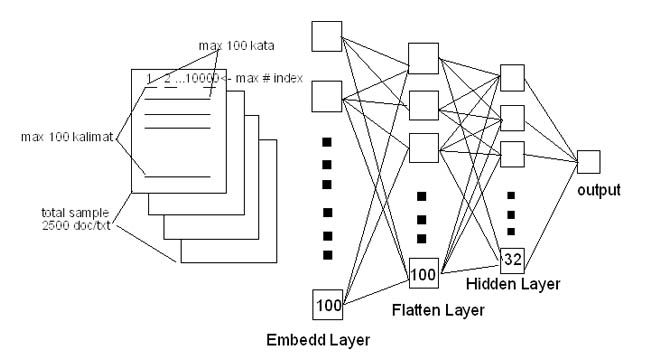

# Me-loading glove ke model 

In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False # agar bobot nya tdk berubah

Men Train model dgn dataset yg telah dibuat

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
7/7 [==============================] - 1s 126ms/step - loss: 0.7655 - acc: 0.7600 - val_loss: 2.7986 - val_acc: 0.4998
Epoch 2/10
7/7 [==============================] - 1s 105ms/step - loss: 0.0730 - acc: 0.9700 - val_loss: 1.3431 - val_acc: 0.5344
Epoch 3/10
7/7 [==============================] - 1s 104ms/step - loss: 0.0058 - acc: 1.0000 - val_loss: 0.9834 - val_acc: 0.5610
Epoch 4/10
7/7 [==============================] - 1s 97ms/step - loss: 0.0030 - acc: 1.0000 - val_loss: 1.0086 - val_acc: 0.5593
Epoch 5/10
7/7 [==============================] - 1s 100ms/step - loss: 0.0022 - acc: 1.0000 - val_loss: 1.0518 - val_acc: 0.5566
Epoch 6/10
7/7 [==============================] - 1s 100ms/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.9730 - val_acc: 0.5667
Epoch 7/10
7/7 [==============================] - 1s 100ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 1.0557 - val_acc: 0.5631
Epoch 8/10
7/7 [==============================] - 1s 103ms/step - loss: 8.9397e-04 - acc: 1

## Melihat performance Model 

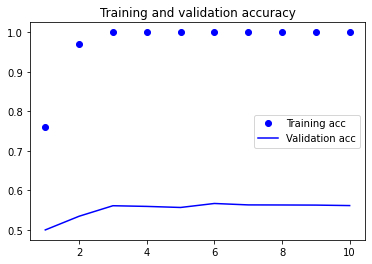

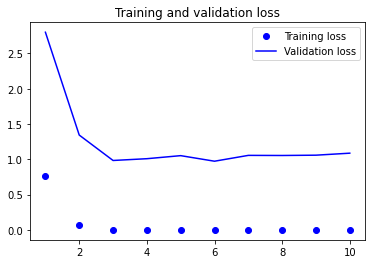

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

# TRANSFER LEARNING
memindahkan weight dr model training ke model baru 

In [ ]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

780/780 [==============================] - 2s 2ms/step - loss: 1.1167 - acc: 0.5501


[1.1167285442352295, 0.550112247467041]

# Menggunakan Glove data 300 Dimensi

In [ ]:
import gensim.downloader as api  #gensim ini kib utk membaca corpus secara api
import numpy as np
from sklearn.manifold import TSNE
import  matplotlib.pyplot as plt

In [ ]:

kata = api.load('glove-wiki-gigaword-300')

[==================================================] 100.0% 376.1/376.1MB downloaded


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:252: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
D =kata.vector_size # ukuran dimensi embbed 
V =len(kata.index2word)#banyak nya token 
D , V  # ukuran dimensi embbed ,dan token 

(300, 400000)

In [ ]:
kata.index2word

['the',
 ',',
 '.',
 'of',
 'to',
 'and',
 'in',
 'a',
 '"',
 "'s",
 'for',
 '-',
 'that',
 'on',
 'is',
 'was',
 'said',
 'with',
 'he',
 'as',
 'it',
 'by',
 'at',
 '(',
 ')',
 'from',
 'his',
 "''",
 '``',
 'an',
 'be',
 'has',
 'are',
 'have',
 'but',
 'were',
 'not',
 'this',
 'who',
 'they',
 'had',
 'i',
 'which',
 'will',
 'their',
 ':',
 'or',
 'its',
 'one',
 'after',
 'new',
 'been',
 'also',
 'we',
 'would',
 'two',
 'more',
 "'",
 'first',
 'about',
 'up',
 'when',
 'year',
 'there',
 'all',
 '--',
 'out',
 'she',
 'other',
 'people',
 "n't",
 'her',
 'percent',
 'than',
 'over',
 'into',
 'last',
 'some',
 'government',
 'time',
 '$',
 'you',
 'years',
 'if',
 'no',
 'world',
 'can',
 'three',
 'do',
 ';',
 'president',
 'only',
 'state',
 'million',
 'could',
 'us',
 'most',
 '_',
 'against',
 'u.s.',
 'so',
 'them',
 'what',
 'him',
 'united',
 'during',
 'before',
 'may',
 'since',
 'many',
 'while',
 'where',
 'states',
 'because',
 'now',
 'city',
 'made',
 'like',
 

In [ ]:
kata['cat'] # vector kata cat

array([-0.29353  ,  0.33247  , -0.047372 , -0.12247  ,  0.071956 ,
       -0.23408  , -0.06238  , -0.0037192, -0.39462  , -0.69411  ,
        0.36731  , -0.12141  , -0.044485 , -0.15268  ,  0.34864  ,
        0.22926  ,  0.54361  ,  0.25215  ,  0.097972 , -0.087305 ,
        0.87058  , -0.12211  , -0.079825 ,  0.28712  , -0.68563  ,
       -0.27265  ,  0.22056  , -0.75752  ,  0.56293  ,  0.091377 ,
       -0.71004  , -0.3142   , -0.56826  , -0.26684  , -0.60102  ,
        0.26959  , -0.17992  ,  0.10701  , -0.57858  ,  0.38161  ,
       -0.67127  ,  0.10927  ,  0.079426 ,  0.022372 , -0.081147 ,
        0.011182 ,  0.67089  , -0.19094  , -0.33676  , -0.48471  ,
       -0.35406  , -0.15209  ,  0.44503  ,  0.46385  ,  0.38409  ,
        0.045081 , -0.59079  ,  0.21763  ,  0.38576  , -0.44567  ,
        0.009332 ,  0.442    ,  0.097062 ,  0.38005  , -0.11881  ,
       -0.42718  , -0.31005  , -0.025058 ,  0.12689  , -0.13468  ,
        0.11976  ,  0.76253  ,  0.2524   , -0.26934  ,  0.0686

In [ ]:
kata.most_similar('sea', topn=7) # kata dengan Sematik(sinomin) dengan 7 rank ker-atas
                                 # eageans= warna biru laut

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('ocean', 0.6844728589057922),
 ('waters', 0.6671042442321777),
 ('seas', 0.6622963547706604),
 ('mediterranean', 0.576117992401123),
 ('coast', 0.5432170629501343),
 ('coastal', 0.5356169939041138),
 ('aegean', 0.5232060551643372)]

In [ ]:
kata.most_similar(positive=['day','red'],negative=['night'],topn=3) #kata yang berlawanan
                                      # siang hari diasosiasikan dgn merah , malam hari diasosiasikan dengan gelap

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('yellow', 0.536474883556366),
 ('blue', 0.469330370426178),
 ('black', 0.45225396752357483)]

In [ ]:
hari = kata.distance('day','night')
warna = kata.distance('red','blue')
hari, warna  # jarak hari mendekati jarak warna (0.36 , 0.32)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


(0.3617287874221802, 0.3263307213783264)

# PETA CORPUS 

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px

In [ ]:
vocab = ["boy", "girl", "man", "woman", "king", "queen", "banana", "apple", "mango", "fruit", "coconut", 
         "orange",'indomie','ayam','nasi','goreng','bag','shoes','rings','stove','kissing','enjoying','run','sleep','work','eat','love']

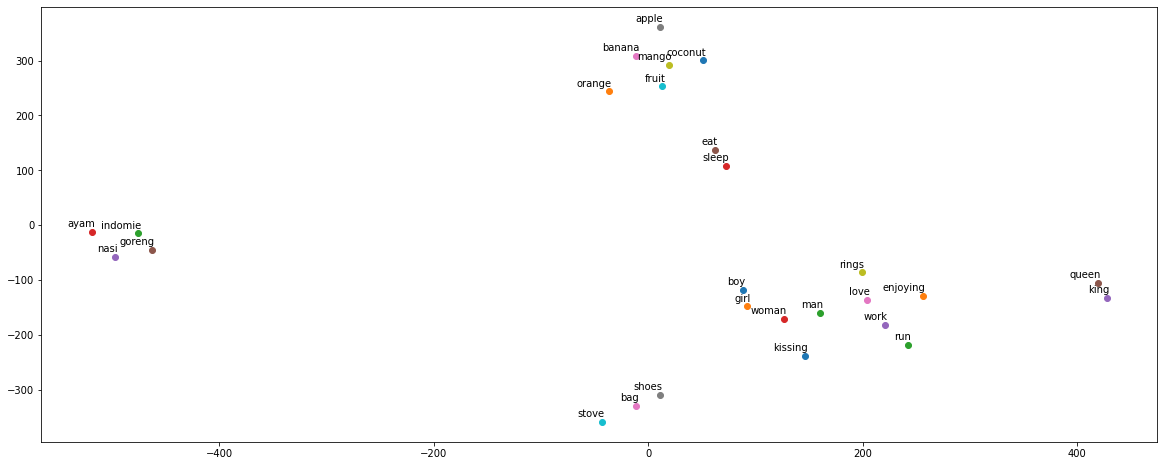

In [ ]:
def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=2, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
        
    plt.figure(figsize=(20,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(3, 3),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
tsne_plot(kata)   